In [1]:
from chromatography.device import Device, DeviceConfig
from chromatography.analyte import Channels

In [2]:
config = DeviceConfig(
    omega=10,
    tau=.4,
    factor=8,
)

device = Device(
    config=config,
)

  0%|                                                       

100%|███████████████████████████████████████████████████████


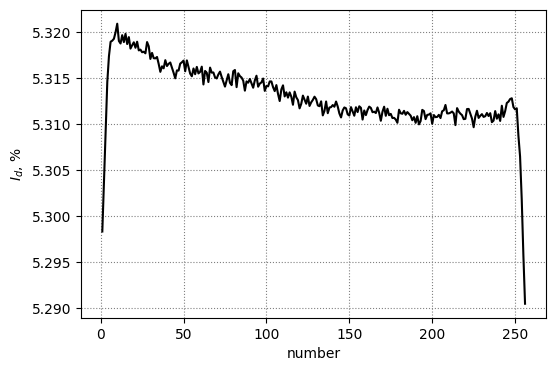

In [3]:
device.calibrate_dark_data(
    n_frames=1_000,
    verbose=True,
    show=True,
)

In [4]:
# base_data = device.read_base_data(
#     n_frames=1,
#     recycle=True,
#     show=True,
# )

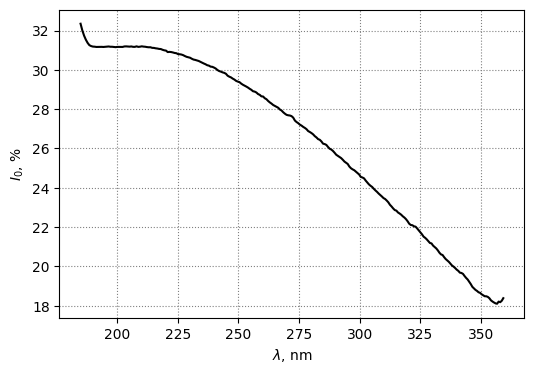

In [5]:
device.calibrate_base_data(
    n_frames=1_000,
    verbose=True,
    show=True,
)

In [6]:
channels = Channels(
    [(225, 10), (250, 10), (275, 10), (325, 50)],
    factor=config.factor,
)
channels = channels.add_ratio(
    (1, 2),
)
channels = channels.add_ratio(
    (3, 4),
)

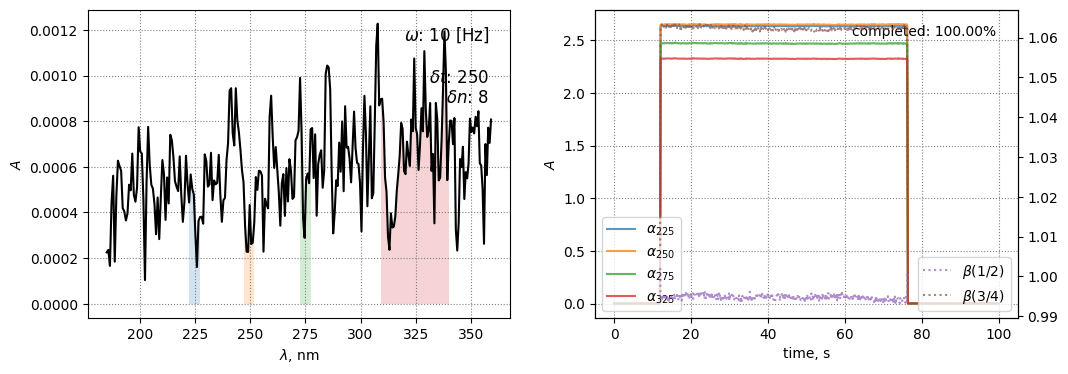

In [7]:
absorbance = device.read(
    duration=100,
    channels=channels,
    show=True,
)

In [8]:
signal = device.calculate_signal(
    absorbance=absorbance,
    channels=channels,
    save=True,
)

,$\alpha_{225}$,$\alpha_{250}$,$\alpha_{275}$,$\alpha_{325}$,$\beta({1} / {2})$,$\beta({3} / {4})$
count,1000.000000,1000.000000,1000.000000,1000.000000,644.000000,644.000000
mean,1.694914,1.703812,1.588525,1.495417,0.994773,1.062207
std,1.262669,1.269375,1.183202,1.113673,0.000668,0.002732
min,-0.001853,-0.002102,-0.002031,-0.001955,0.993149,1.007651
25%,0.000397,0.000326,0.000561,0.000658,0.994400,1.062059
50%,2.634694,2.648679,2.468989,2.324643,0.994779,1.062359
75%,2.637018,2.650905,2.471226,2.326055,0.995129,1.062648
max,2.643664,2.658100,2.478140,2.330588,1.002097,1.063469


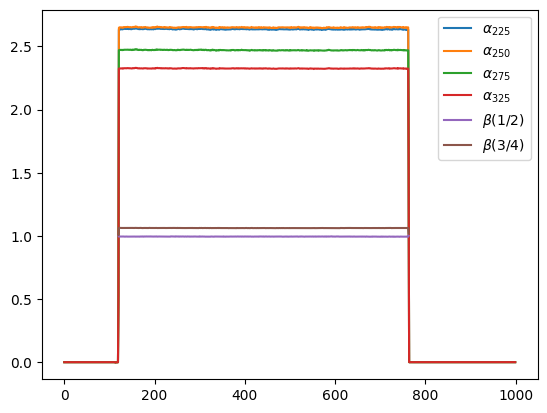

In [9]:
import pandas as pd

df = pd.DataFrame(
    signal,
    columns=[str(channel) for channel in channels],
)
df.plot()

df.describe()